# Analisis

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random, math

In [3]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Cargar el dataset con el resultado de grafos randoms
### los "_tabu" son los experimentos de nuevo compilados con GA de sol inicial 

In [4]:
#df_resultados_tabu = pd.read_csv("resultados/resultado_tabu.csv");
#df_peor_caso_agm_tabu = pd.read_csv("resultados/resultado_agm_tabu.csv");
#df_resultados_random_param_tabu = pd.read_csv("resultados/resultado_tabu_params_random_tabu.csv");
#df_resultados_opt_param_tabu = pd.read_csv("resultados/resultado_tabu_params_opt_tabu.csv");


In [86]:

# LO DE RANDOM LO CORRIMO?
df_resultados_opts = pd.read_csv("resultados/resultado_opts.csv");
df_eulerianos = pd.read_csv("resultados/resultado_euler.csv")
df_peor_caso_agm = pd.read_csv("resultados/resultado_agm_peor.csv");
df_peor_caso_ag = pd.read_csv("resultados/resultado_peor_ag2.csv");
df_resultados_opt_param = pd.read_csv("resultados/resultado_tabu_params_opt.csv");
df_resultados_opt_param_tabu = pd.read_csv("resultados/resultado_tabu_params_opt.csv")
df_resultados_tabu_finoli = pd.read_csv("resultados/resultado_tabu_params_finoli_opt.csv")
df_resultados_tabu_agm_eu = pd.read_csv("resultados/resultado_euler_TSP_AGM.csv")
df_resultados_tabu_agm_opt = pd.read_csv("resultados/resultado_opts_TSP_AGM.csv")
df_resultados_tabu_ga_opt = pd.read_csv("resultados/resultado_opts_TSP_GA.csv")
df_resultados_tabu_ga_eu = pd.read_csv("resultados/resultado_euler_TSP_GA.csv")
df_resultados_tabu_ins_eu =pd.read_csv("resultados/resultado_euler_TSP_INS.csv")
df_resultados_tabu_ins_opt =pd.read_csv("resultados/resultado_opts_TSP_INS.csv")
#df_resultados_random_param = pd.read_csv("resultados/resultado_tabu_params_random.csv");


### Dropeamos los de TABU de antes

In [201]:
#df_resultados = df_resultados.drop(((df_resultados["metodo"] == "TABU_CICLOS") | (df_resultados["metodo"] == "TABU_ESTRUCTURA")).index, axis = 0, inplace=True)
#df_peor_caso_agm = df_peor_caso_agm.drop(((df_peor_caso_agm["metodo"] == "TABU_CICLOS") | (df_peor_caso_agm["metodo"] == "TABU_ESTRUCTURA")).index, axis = 0, inplace=True)
#df_resultados_random_param = df_resultados_random_param.drop(((df_resultados_random_param["metodo"].str.contains("TABU_CICLOS")) | (df_resultados_random_param["metodo"].str.contains("TABU_ESTRUCTURA"))).index, axis = 0, inplace=True)
#df_resultados_opt_param = df_resultados_opt_param.drop(((df_resultados_opt_param["metodo"].str.contains("TABU_CICLOS")) | (df_resultados_opt_param["metodo"].str.contains("TABU_ESTRUCTURA"))).index, axis = 0, inplace=True)

### Le agregamos los nuevos datos TABU

In [ ]:
#df_resultados = df_resultados.append(df_resultados_tabu, ignore_index=True)
#df_peor_caso_agm = df_peor_caso_agm.append(df_peor_caso_agm_tabu, ignore_index=True)
#df_resultados_random_param = df_resultados_random_param.append(df_resultados_random_param_tabu, ignore_index=True)
#df_resultados_opt_random = df_resultados_opt_random.append(df_resultados_opt_random, ignore_index=True)

# Experimento con eulerianos

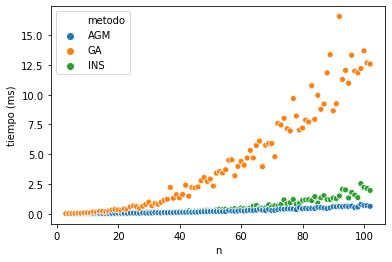

In [58]:
df_grafoEuleriano = df_eulerianos[df_eulerianos["dataset"]=="grafo-euleriano"].copy(); # lo usamos tambien abajo
fig = sns.scatterplot(data=df_grafoEuleriano, x='n', y='tiempo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='tiempo (ms)');

# Guardamos la figura
plt.savefig("graficos/eulerianos/tiempo-grafos-eulerianos.svg");

# Graficamos segun heuristicas

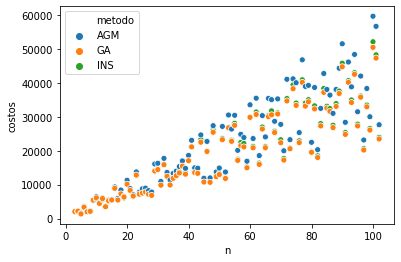

In [59]:
fig = sns.scatterplot(data=df_grafoEuleriano, x='n', y='costo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='costos');

plt.savefig("graficos/eulerianos/costo-grafos-eulerianos.svg");
## IGUAL AL DE ARRIBA PERO CON COSTOS

# ESTO NO LO CORRIMO

# Experimento grafos con pesos aleatorios
## Graficos para las heuristicas por:
- Tiempo en relacion al tamanio
- Costo en relacion al tamanio
- Relacion entre costo y tiempo

Estan en este orden los graficos

In [3]:
df_grafoPropio = df_resultados[df_resultados["dataset"]=="grafo-propio"].copy(); # lo usamos tambien abajo
fig = sns.scatterplot(data=df_grafoPropio, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

# Guardamos la figura
plt.savefig("graficos/tiempo-grafos-propios.svg");

# Graficamos segun heuristicas

NameError: name 'df_resultados' is not defined

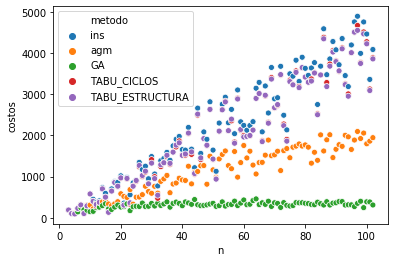

In [5]:
fig = sns.scatterplot(data=df_grafoPropio, x='n', y='costo', hue='metodo');
fig.set(xlabel='n', ylabel='costos');

plt.savefig("graficos/costo-grafos-propios.svg");
## IGUAL AL DE ARRIBA PERO CON COSTOS

**Borre sin querer la de tiempo/costo** pero creo que vale verga

---
---
# ACA ABAJO SI
# Experimento 2, Peor caso AGM

## Cargar el dataframe de los resultados


In [60]:
df_peor_caso_agm.head()

dataset  n    m metodo   tiempo  costo
0  peor-caso-agm  3  3.0    INS  0.03886    196
1  peor-caso-agm  3  3.0    AGM  0.04746    196
2  peor-caso-agm  3  3.0     GA  0.04708    196
3  peor-caso-agm  4  6.0    INS  0.02764    227
4  peor-caso-agm  4  6.0    AGM  0.02246    351

### Costo

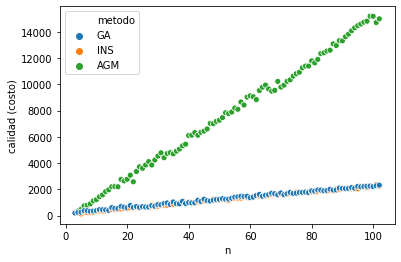

In [17]:
fig = sns.scatterplot(data=df_peor_caso_agm, x='n', y='costo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='calidad (costo)');

plt.savefig("graficos/peor agm/costo-peor-caso-agm.svg");


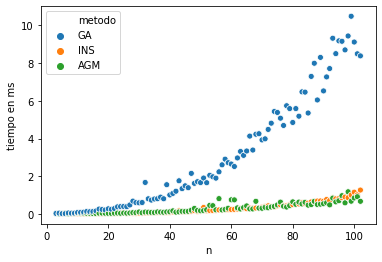

In [16]:
fig = sns.scatterplot(data=df_peor_caso_agm, x='n', y='tiempo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='tiempo en ms');

plt.savefig("graficos/peor agm/tiempo-peor-caso-agm.svg");


### Tiempo-Costo

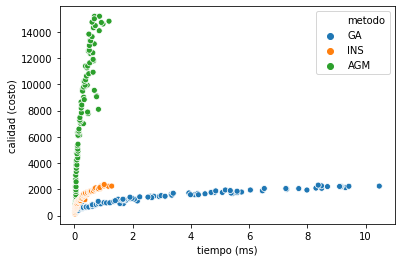

In [18]:
fig = sns.scatterplot(data=df_peor_caso_agm, x='tiempo', y='costo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='tiempo (ms)', ylabel='calidad (costo)');

plt.savefig("graficos/peor agm/tiempo-costo-peor-caso-agm.svg");


# PEOR CASO GA

In [47]:
ag = df_peor_caso_ag.copy()
#ag = ag[(ag["metodo"] != "TABU_CICLOS") & (ag["metodo"] != "TABU_ESTRUCTURA")]
ag.head()

dataset  n    m metodo  tiempo    costo
0  peor-caso-ga  3  3.0    INS  0.0147  1000002
1  peor-caso-ga  3  3.0    AGM  0.0287  1000002
2  peor-caso-ga  3  3.0     GA  0.0255  1000002
3  peor-caso-ga  4  6.0    INS  0.0148        6
4  peor-caso-ga  4  6.0    AGM  0.0327  1000003

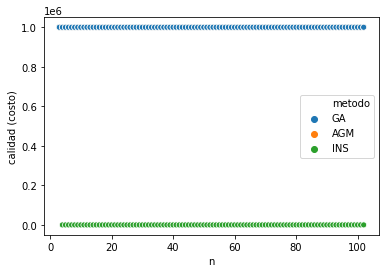

In [48]:
fig = sns.scatterplot(data=df_peor_caso_ag, x='n', y='costo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='calidad (costo)');

plt.savefig("graficos/peor ga/costo-peor-caso-AG2.svg");


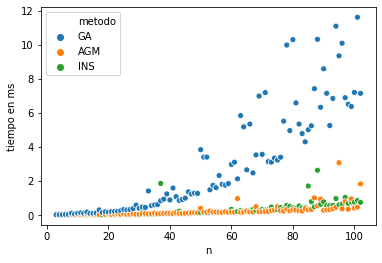

In [49]:
fig = sns.scatterplot(data=df_peor_caso_ag, x='n', y='tiempo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='tiempo en ms');

plt.savefig("graficos/peor ga/tiempo-peor-caso-AG2.svg");

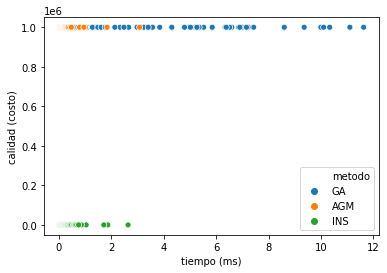

In [50]:
fig = sns.scatterplot(data=df_peor_caso_ag, x='tiempo', y='costo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='tiempo (ms)', ylabel='calidad (costo)');

plt.savefig("graficos/peor ga/tiempo-costo-peor-caso-AG2.svg");

---
---

# ETO SI TAMO PIOLA MAESTRO

# Experimento Gap entre optimos

In [63]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_opts.head()

dataset     n          m metodo        tiempo   costo        gap
0  sol_optimas  1432  1024596.0    INS   3685.763333  173256  13.261424
1  sol_optimas  1432  1024596.0    AGM     77.754900  218883  43.088841
2  sol_optimas  1432  1024596.0     GA  16095.133333  182713  19.443682
3  sol_optimas   666   221445.0    INS    265.638667  345738  17.454936
4  sol_optimas   666   221445.0    AGM     17.808367  399767  35.809796

### Costo

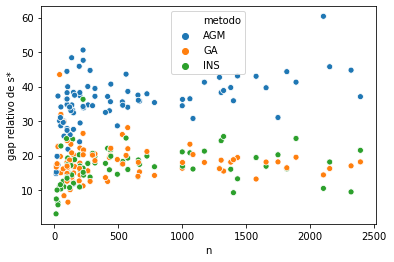

In [137]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts ##[(df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA") & (df_opts["metodo"] != "agm")]
fig = sns.scatterplot(data=df_optt, x='n', y='gap', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='gap relativo de s*');

plt.savefig("graficos/opt/gap-heuristicas-opt.svg");

### Tiempo

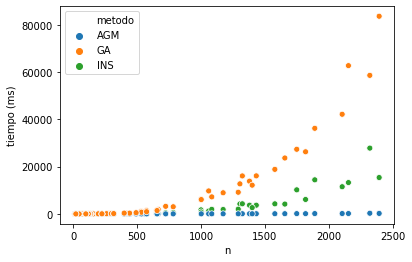

In [138]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts ##[(df_opts["metodo"] != "TABU_CICLOS") & (df_opts["metodo"] != "TABU_ESTRUCTURA") & (df_opts["metodo"] != "agm")]
#df_optt = df_optt[df_optt["tiempo"] < 40000]
fig = sns.scatterplot(data=df_optt, x='n', y='tiempo', hue='metodo', hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/opt/tiempo-heuristicas-opt.svg");

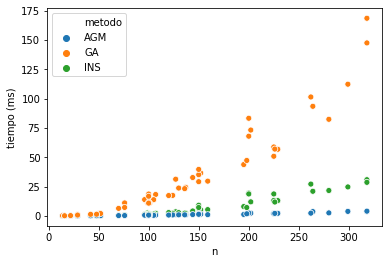

In [139]:
df_opts = pd.read_csv("resultados/resultado_opts.csv");
df_optt = df_opts[df_opts["n"] < 400]  
fig = sns.scatterplot(data=df_optt, x='n', y='tiempo', hue='metodo',hue_order={"GA","INS","AGM"});
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/opt/tiempo-heuristicas-opt-cerca.svg");

---
---

# Y ESTO NO, PERO QUIEN LO QUIERE A ETO

# Experimento TABU_CICLOS parametros para grafo random G100


In [140]:
ciclos_random_param = df_resultados_random_param[df_resultados_random_param["metodo"].str.contains("TABU_CICLOS", na=False)].copy();
ciclos_random_param = ciclos_random_param[(ciclos_random_param["memoria"] > 0) & (ciclos_random_param["vecindad"] > 0)] 
ciclos_random_param.head()

dataset    n       m                 metodo   tiempo  costo  memoria  \
0  grafo-propio  100  4950.0  TABU_CICLOS 10 10 100  102.824    306       10   
1  grafo-propio  100  4950.0  TABU_CICLOS 10 10 150  132.137    306       10   
2  grafo-propio  100  4950.0  TABU_CICLOS 10 10 200  205.960    273       10   
3  grafo-propio  100  4950.0  TABU_CICLOS 10 10 250  236.842    275       10   
4  grafo-propio  100  4950.0  TABU_CICLOS 10 10 300  243.667    275       10   

   vecindad  iteraciones  
0        10          100  
1        10          150  
2        10          200  
3        10          250  
4        10          300

## VECINDAD

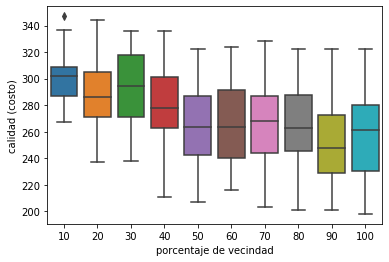

In [154]:
fig = sns.boxplot(data=ciclos_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/tabu/ciclos/ciclos-vecindad-costo.svg");

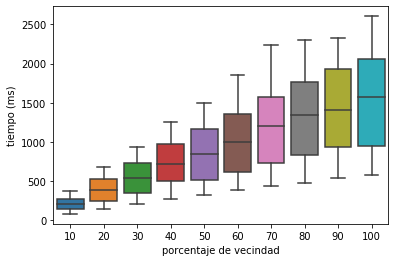

In [153]:
fig = sns.boxplot(data=ciclos_random_param, x='vecindad', y='tiempo');
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/ciclos/ciclos-vecindad-tiempo.svg");

## MEMORIA

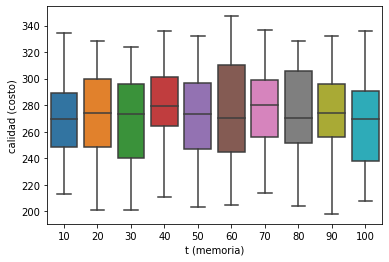

In [155]:
fig = sns.boxplot(data=ciclos_random_param, x='memoria', y='costo');
fig.set(xlabel='t (memoria)', ylabel='calidad (costo)');

plt.savefig("graficos/tabu/ciclos/ciclos-memoria-costo.svg");

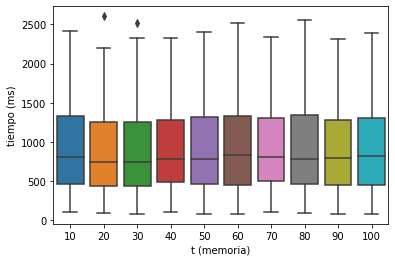

In [156]:
fig = sns.boxplot(data=ciclos_random_param, x='memoria', y='tiempo');
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/ciclos/ciclos-memoria-tiempo.svg");

### ITERACIONES

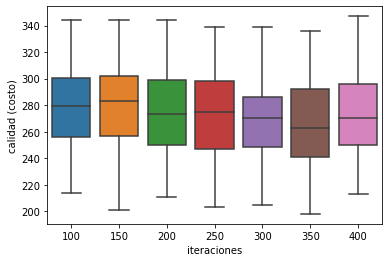

In [157]:
fig = sns.boxplot(data=ciclos_random_param, x='iteraciones', y='costo');
fig.set(xlabel='iteraciones', ylabel='calidad (costo)');

plt.savefig("graficos/tabu/ciclos/ciclos-iteraciones-costo.svg");

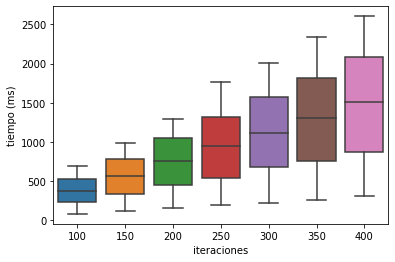

In [158]:
fig = sns.boxplot(data=ciclos_random_param, x='iteraciones', y='tiempo');
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/ciclos/ciclos-iteraciones-tiempo.svg");

# RANDOMS CON TABU_ESTRUCTURA

In [29]:
estructura_random_param = df_resultados_random_param[df_resultados_random_param["metodo"].str.contains("TABU_ESTRUCTURA", na=False)].copy();
estructura_random_param = estructura_random_param[(estructura_random_param["memoria"] > 0) & (estructura_random_param["vecindad"] > 0)] 
estructura_random_param.head()

NameError: name 'df_resultados_random_param' is not defined

### VECINDAD

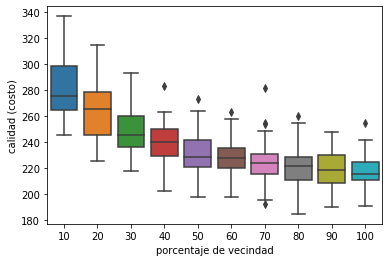

In [169]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/tabu/estructura/estructura-vecindad-costo.svg");

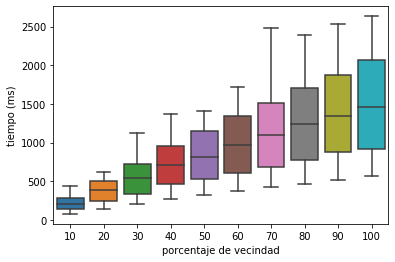

In [173]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='tiempo');
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/estructura/estructura-vecindad-tiempo.svg");

### MEMORIA

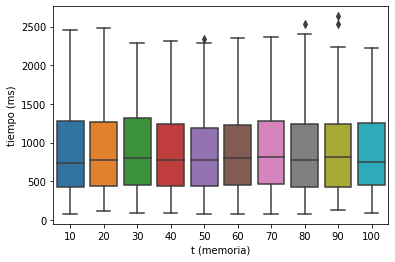

In [174]:
fig = sns.boxplot(data=estructura_random_param, x='memoria', y='tiempo');
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/estructura/estructura-memoria-tiempo.svg");

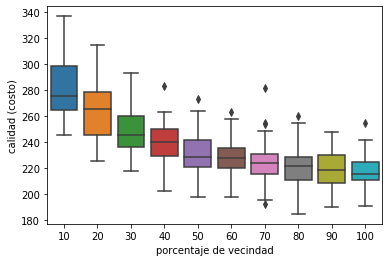

In [175]:
fig = sns.boxplot(data=estructura_random_param, x='vecindad', y='costo');
fig.set(xlabel='porcentaje de vecindad', ylabel='calidad (costo)');

plt.savefig("graficos/tabu/estructura/estructura-vecindad-costo.svg");

### ITERACIONES

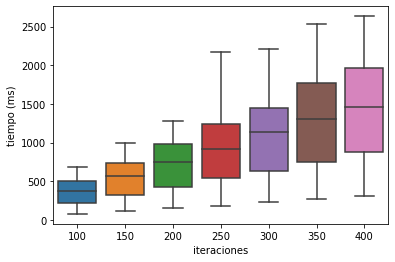

In [176]:
fig = sns.boxplot(data=estructura_random_param, x='iteraciones', y='tiempo');
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/estructura/estructura-iteraciones-tiempo.svg");

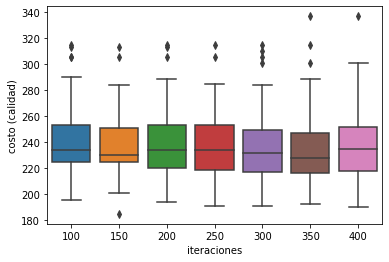

In [177]:
fig = sns.boxplot(data=estructura_random_param, x='iteraciones', y='costo');
fig.set(xlabel='iteraciones', ylabel='costo (calidad)');

plt.savefig("graficos/tabu/estructura/estructura-iteraciones-costo.svg");

---
---

# Experimento TABU_CICLOS parametros para LAS 10 INSTANCIAS

In [67]:
optimosPorN = {127:118282 , 198:15780 , 280:2579 , 318:42029 , 439:107217 , 225:3919, 299:48191, 195:2323, 152:73682, 400:15281}
print(optimosPorN[127])

118282


In [1]:
def func(x):
    nodos = x["n"]
    optimo = optimosPorN[nodos]
    costo = x["costo"]
    return (costo/optimo)*100 - 100

In [69]:
ciclos_opt_param = df_resultados_opt_param[df_resultados_opt_param["metodo"].str.contains("TABU_CICLOS")]
ciclos_opt_param = ciclos_opt_param[(ciclos_opt_param["memoria"] > 0)]
#ciclos_opt_param["gap"] = ciclos_opt_param["costo"] - optimo_linhp
ciclos_opt_param["gap"] = ciclos_opt_param.apply(lambda row: func(row), axis=1)
ciclos_opt_param.head()
#display(eeee)
# COn eso ultimo chequie el costo, agarrando el optimo y haciendole optimo + optimo*gap/100 y daba bien

dataset    n       m                 metodo   tiempo   costo  memoria  \
0  sol_optimas  127  8001.0  TABU_CICLOS 40 10 100  133.299  125739       40   
1  sol_optimas  127  8001.0  TABU_CICLOS 40 10 200  155.572  124463       40   
2  sol_optimas  127  8001.0  TABU_CICLOS 40 10 300  237.366  124290       40   
3  sol_optimas  127  8001.0  TABU_CICLOS 40 10 400  332.314  124242       40   
4  sol_optimas  127  8001.0  TABU_CICLOS 40 10 500  413.010  124135       40   

   vecindad  iteraciones       gap  
0        10          100  6.304425  
1        10          200  5.225647  
2        10          300  5.079387  
3        10          400  5.038806  
4        10          500  4.948344

# JITMAPS PIOLA 

In [117]:
ciclos = ciclos_opt_param.copy();

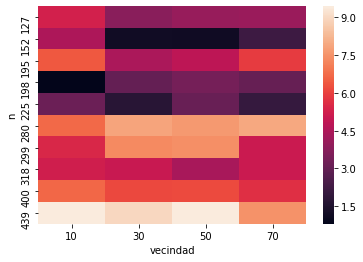

In [124]:
vecindad = pd.pivot_table(ciclos, values='gap', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/ciclos/heatmap-ciclos-vecindad");

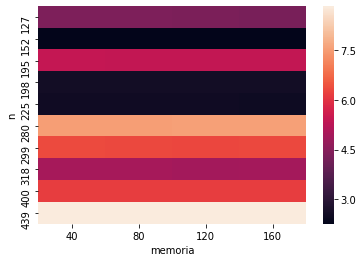

In [125]:
memoria = pd.pivot_table(ciclos, values='gap', index=['n'], columns='memoria')

sns.heatmap(memoria);

plt.savefig("graficos/tabu/ciclos/heatmap-ciclos-memoria");

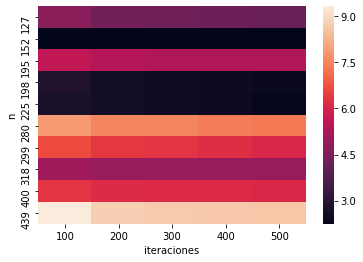

In [126]:
iteraciones = pd.pivot_table(ciclos, values='gap', index=['n'], columns='iteraciones')
sns.heatmap(iteraciones);

plt.savefig("graficos/tabu/ciclos/heatmap-ciclos-iteraciones");

### VECINDAD

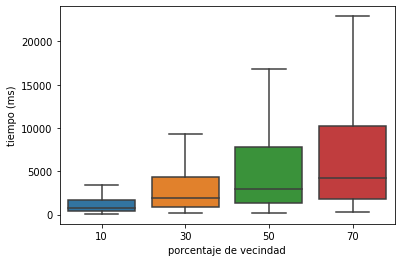

In [70]:
fig = sns.boxplot(data=ciclos_opt_param, x='vecindad', y='tiempo', showfliers = False);
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/ciclos/ciclos-vecindad-tiempo-opt.svg");

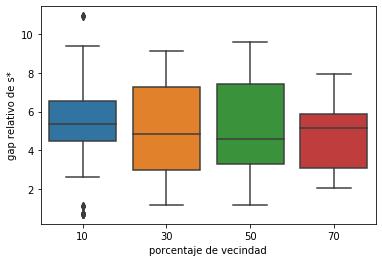

In [72]:
fig = sns.boxplot(data=ciclos_opt_param, x='vecindad', y='gap');
fig.set(xlabel='porcentaje de vecindad', ylabel='gap relativo de s*');

plt.savefig("graficos/tabu/ciclos/ciclos-vecindad-gap-opt.svg");

### MEMORIA

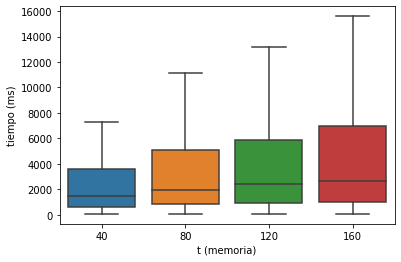

In [73]:
fig = sns.boxplot(data=ciclos_opt_param, x='memoria', y='tiempo', showfliers = False);
fig.set(xlabel='t (memoria)', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/ciclos/ciclos-memoria-tiempo-opt.svg");

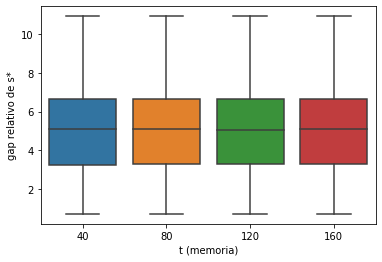

In [74]:
fig = sns.boxplot(data=ciclos_opt_param, x='memoria', y='gap');
fig.set(xlabel='t (memoria)', ylabel='gap relativo de s*');

plt.savefig("graficos/tabu/ciclos/ciclos-memoria-gap-opt.svg");

### ITERACIONES

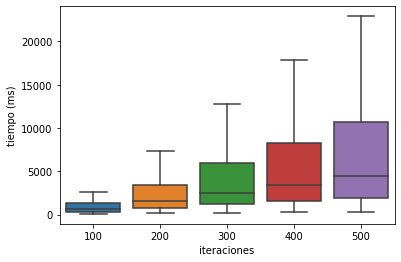

In [75]:
fig = sns.boxplot(data=ciclos_opt_param, x='iteraciones', y='tiempo', showfliers = False);
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/ciclos/ciclos-iteraciones-tiempo-opt.svg");

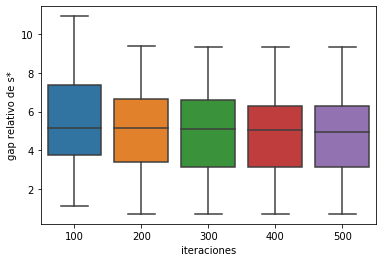

In [76]:
fig = sns.boxplot(data=ciclos_opt_param, x='iteraciones', y='gap');
fig.set(xlabel='iteraciones', ylabel='gap relativo de s*');

plt.savefig("graficos/tabu/ciclos/ciclos-iteraciones-costo-opt.svg");

# Experimento TABU_ESTRUCTURA parametros para LAS 10 INSTANCIAS

In [95]:
estructura_opt_param = df_resultados_opt_param_tabu[df_resultados_opt_param_tabu["metodo"].str.contains("TABU_ESTRUCTURA")]
estructura_opt_param = estructura_opt_param[(estructura_opt_param["memoria"] > 0)]
estructura_opt_param["gap"] = estructura_opt_param.apply(lambda row: func(row), axis=1)
estructura_opt_param.head()


dataset    n       m                     metodo    tiempo   costo  \
80  sol_optimas  127  8001.0  TABU_ESTRUCTURA 40 10 100   74.6837  125407   
81  sol_optimas  127  8001.0  TABU_ESTRUCTURA 40 10 200  114.4710  125407   
82  sol_optimas  127  8001.0  TABU_ESTRUCTURA 40 10 300  143.2610  125407   
83  sol_optimas  127  8001.0  TABU_ESTRUCTURA 40 10 400  169.4260  125407   
84  sol_optimas  127  8001.0  TABU_ESTRUCTURA 40 10 500  232.1740  125407   

    memoria  vecindad  iteraciones      gap  
80       40        10          100  6.02374  
81       40        10          200  6.02374  
82       40        10          300  6.02374  
83       40        10          400  6.02374  
84       40        10          500  6.02374

# JITMAPS PIOLA

In [119]:
estructura = estructura_opt_param.copy();

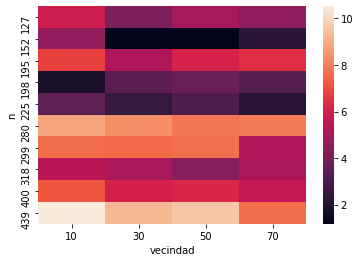

In [127]:
vecindad = pd.pivot_table(estructura, values='gap', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/estructura/heatmap-estructura-vecindad");

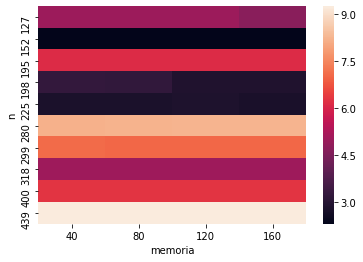

In [128]:
memoria = pd.pivot_table(estructura, values='gap', index=['n'], columns='memoria')

sns.heatmap(memoria);

plt.savefig("graficos/tabu/estructura/heatmap-estructura-memoria");

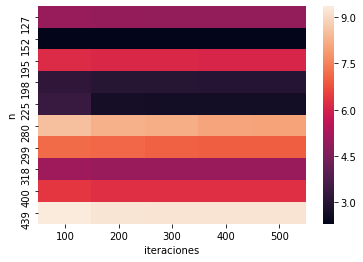

In [129]:
iteraciones = pd.pivot_table(estructura, values='gap', index=['n'], columns='iteraciones')

sns.heatmap(iteraciones);

plt.savefig("graficos/tabu/estructura/heatmap-estructura-iteraciones");

### VECINDAD

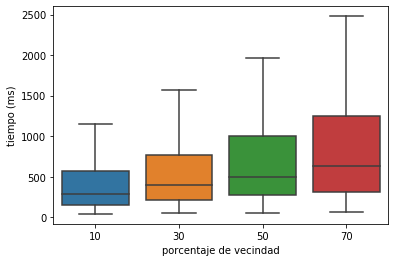

In [78]:
fig = sns.boxplot(data=estructura_opt_param, x='vecindad', y='tiempo', showfliers = False);
fig.set(xlabel='porcentaje de vecindad', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/estructura/estructura-vecindad-tiempo-opt.svg");

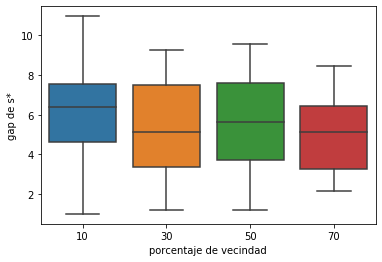

In [79]:
fig = sns.boxplot(data=estructura_opt_param, x='vecindad', y='gap');
fig.set(xlabel='porcentaje de vecindad', ylabel='gap de s*');

plt.savefig("graficos/tabu/estructura/estructura-vecindad-gap-opt.svg");

### MEMORIA

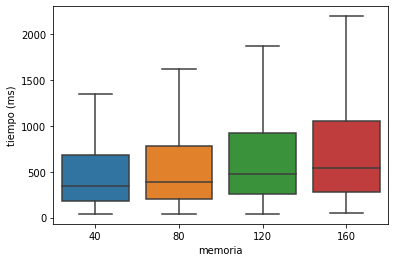

In [80]:
fig = sns.boxplot(data=estructura_opt_param, x='memoria', y='tiempo', showfliers = False);
fig.set(xlabel='memoria', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/estructura/estructura-memoria-tiempo-opt.svg");

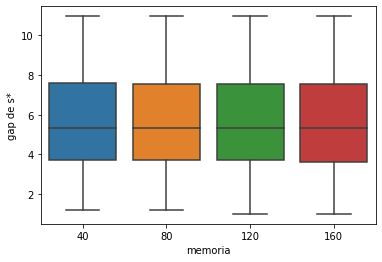

In [81]:
fig = sns.boxplot(data=estructura_opt_param, x='memoria', y='gap');
fig.set(xlabel='memoria', ylabel='gap de s*');

plt.savefig("graficos/tabu/estructura/estructura-memoria-gap-opt.svg");

### ITERACIONES

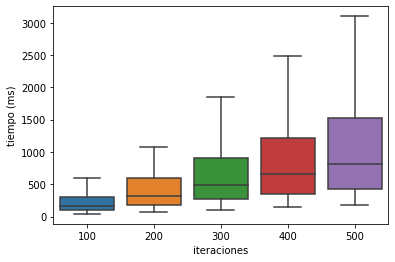

In [82]:
fig = sns.boxplot(data=estructura_opt_param, x='iteraciones', y='tiempo', showfliers = False);
fig.set(xlabel='iteraciones', ylabel='tiempo (ms)');

plt.savefig("graficos/tabu/estructura/estructura-iteraciones-tiempo-opt.svg");

In [6]:
fig = sns.boxplot(data=estructura_opt_param, x='iteraciones', y='gap');
fig.set(xlabel='iteraciones', ylabel='gap de s*');

plt.savefig("graficos/tabu/estructura/estructura-iteraciones-gap-opt.svg");

NameError: name 'estructura_opt_param' is not defined

# ESTOS SON LOS HEATMAPS PARA LOS EXPS FINOLIS


In [7]:
optimosPorN = {127:118282 , 198:15780 , 280:2579 , 318:42029 , 439:107217 , 225:3919, 299:48191, 195:2323, 152:73682, 400:15281, 1060:224094, 783:8806, 70:675, 575:6773}


In [33]:
estructura_opt_param = df_resultados_tabu_finoli[df_resultados_tabu_finoli["metodo"].str.contains("TABU_ESTRUCTURA")]
estructura_opt_param = estructura_opt_param[(estructura_opt_param["memoria"] > 0) & (estructura_opt_param["n"] > 8)]
estructura_opt_param["gap"] = estructura_opt_param.apply(lambda row: func(row), axis=1)

estructura_opt_param.head()

dataset    n       m                      metodo    tiempo   costo  \
20  sol_optimas  127  8001.0   TABU_ESTRUCTURA 160 5 300   80.0806  125704   
21  sol_optimas  127  8001.0  TABU_ESTRUCTURA 160 10 300   95.1763  124933   
22  sol_optimas  127  8001.0  TABU_ESTRUCTURA 160 15 300  111.0970  125169   
23  sol_optimas  127  8001.0  TABU_ESTRUCTURA 160 20 300  129.8710  123295   
24  sol_optimas  127  8001.0  TABU_ESTRUCTURA 160 25 300  138.3080  122547   

    memoria  vecindad  iteraciones       gap  
20      160         5          300  6.274835  
21      160        10          300  5.623003  
22      160        15          300  5.822526  
23      160        20          300  4.238177  
24      160        25          300  3.605790

In [34]:
estructura = estructura_opt_param.copy();

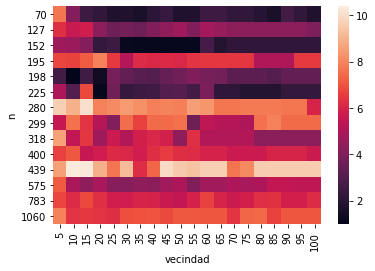

In [35]:
vecindad = pd.pivot_table(estructura, values='gap', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/estructura/finoli/heatmap-estructura-vecindad-finoli");

In [55]:
estructura_opt_param_b = df_resultados_tabu_finoli[df_resultados_tabu_finoli["metodo"].str.contains("TABU_ESTRUCTURA")]
#este es el caso menor a 200
estructura_opt_param_1 = estructura_opt_param_b[(estructura_opt_param_b["memoria"] > 0) & (estructura_opt_param_b["n"] < 200)]
#este es el caso entre 200 y 400
estructura_opt_param_2 = estructura_opt_param_b[(estructura_opt_param_b["memoria"] > 0) & (estructura_opt_param_b["n"] > 200)& (estructura_opt_param_b["n"] < 400)]
#este es el caso mayor a 400
estructura_opt_param_3 = estructura_opt_param_b[(estructura_opt_param_b["memoria"] > 0) & (estructura_opt_param_b["n"] > 400)]
#los separamos para que se aprecie el aumento en el consumo del recurso temporal
estructura_1 = estructura_opt_param_1.copy();
estructura_2 = estructura_opt_param_2.copy();
estructura_3 = estructura_opt_param_3.copy();

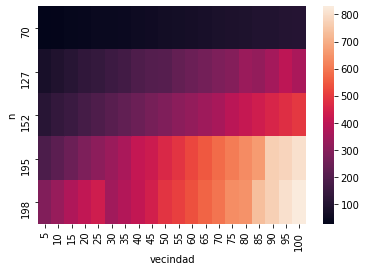

In [56]:
vecindad = pd.pivot_table(estructura_1, values='tiempo', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/estructura/finoli/heatmap-estructura-tiempo-vecindad-finoli-1");

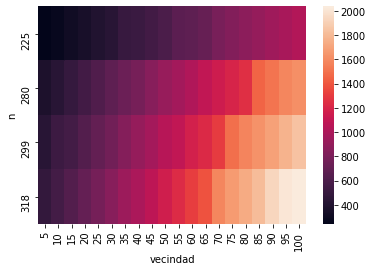

In [57]:
vecindad = pd.pivot_table(estructura_2, values='tiempo', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/estructura/finoli/heatmap-estructura-tiempo-vecindad-finoli-2");

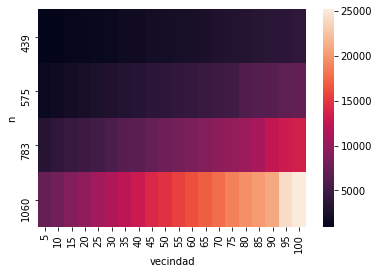

In [58]:
vecindad = pd.pivot_table(estructura_3, values='tiempo', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/estructura/finoli/heatmap-estructura-tiempo-vecindad-finoli-3");

# LO MISMO PARA CICLOS

In [59]:
ciclos_opt_param = df_resultados_tabu_finoli[df_resultados_tabu_finoli["metodo"].str.contains("TABU_CICLOS")]
ciclos_opt_param = ciclos_opt_param[(ciclos_opt_param["vecindad"] > 0)]
ciclos_opt_param["gap"] = ciclos_opt_param.apply(lambda row: func(row), axis=1)
ciclos_opt_param.head()

dataset    n       m                  metodo   tiempo   costo  memoria  \
0  sol_optimas  127  8001.0   TABU_CICLOS 160 5 300  158.896  123528      160   
1  sol_optimas  127  8001.0  TABU_CICLOS 160 10 300  239.156  124290      160   
2  sol_optimas  127  8001.0  TABU_CICLOS 160 15 300  350.590  122177      160   
3  sol_optimas  127  8001.0  TABU_CICLOS 160 20 300  417.571  122860      160   
4  sol_optimas  127  8001.0  TABU_CICLOS 160 25 300  633.780  122682      160   

   vecindad  iteraciones       gap  
0         5          300  4.435163  
1        10          300  5.079387  
2        15          300  3.292978  
3        20          300  3.870411  
4        25          300  3.719924

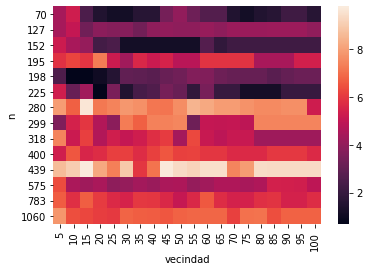

In [60]:
ciclos = ciclos_opt_param.copy();
vecindad = pd.pivot_table(ciclos, values='gap', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/ciclos/finoli/heatmap-ciclos-vecindad-finoli");

In [61]:
ciclos_opt_param_b = df_resultados_tabu_finoli[df_resultados_tabu_finoli["metodo"].str.contains("TABU_CICLOS")]
#este es el caso menor a 200
ciclos_opt_param_1 = ciclos_opt_param_b[(ciclos_opt_param_b["memoria"] > 0) & (ciclos_opt_param_b["n"] < 200)]
#este es el caso entre 200 y 400
ciclos_opt_param_2 = ciclos_opt_param_b[(ciclos_opt_param_b["memoria"] > 0) & (ciclos_opt_param_b["n"] > 200)& (ciclos_opt_param_b["n"] < 400)]
#este es el caso mayor a 400
ciclos_opt_param_3 = ciclos_opt_param_b[(ciclos_opt_param_b["memoria"] > 0) & (ciclos_opt_param_b["n"] > 400)]
#los separamos para que se aprecie el aumento en el consumo del recurso temporal
ciclos_1 = ciclos_opt_param_1.copy();
ciclos_2 = ciclos_opt_param_2.copy();
ciclos_3 = ciclos_opt_param_3.copy();

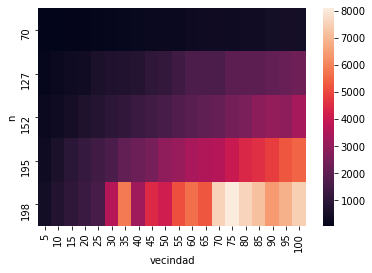

In [62]:
vecindad = pd.pivot_table(ciclos_1, values='tiempo', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/ciclos/finoli/heatmap-ciclos-tiempo-vecindad-finoli-1");

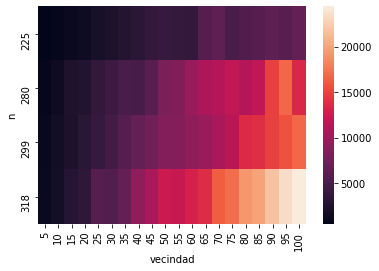

In [63]:
vecindad = pd.pivot_table(ciclos_2, values='tiempo', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/ciclos/finoli/heatmap-ciclos-tiempo-vecindad-finoli-2");

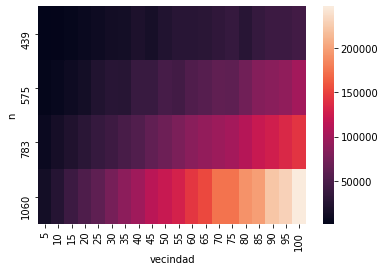

In [64]:
vecindad = pd.pivot_table(ciclos_3, values='tiempo', index=['n'], columns='vecindad')

sns.heatmap(vecindad);

plt.savefig("graficos/tabu/ciclos/finoli/heatmap-ciclos-tiempo-vecindad-finoli-3");

# ESTO HAY QUE VER QUE ONDA, NO LO HICIMO
## ES LO DE UNA VEZ TENEMOS LOS PARAMETROS USAR LAS DISTINTAS HEUR INICIALES

# TABU mejores parametros
## Usando en tabu como heuristica inicial
### agm

In [97]:
def limpiar(dataframe):
    for n in range(0, dataframe.shape[0]):
        fila_n = dataframe.iloc[n];
        fila_n["metodo"] = (fila_n["metodo"].split(" "))[0]
        dataframe.iloc[n] = fila_n 
    return dataframe

def gap(dataframe):
        df_datos_agm = df_eulerianos[(df_eulerianos["metodo"] == "AGM")].copy()
        df_datos_ga  = df_eulerianos[(df_eulerianos["metodo"] == "GA")].copy()
        df_datos_ins = df_eulerianos[(df_eulerianos["metodo"] == "INS")].copy()
        for k in range(0, dataframe.shape[0]):
            n = int(dataframe.iloc[k]["n"]) 
            costo = int(dataframe.iloc[k]["costo"])
            for i in range(0, df_datos_agm.shape[0]):
                if df_datos_agm.iloc[i]["n"]== n:
                    optimo_agm = int(df_datos_agm.iloc[i]["costo"])
                if df_datos_ga.iloc[i]["n"] == n:
                    optimo_ga = int(df_datos_ga.iloc[i]["costo"])
                if df_datos_ins.iloc[i]["n"] == n:
                    optimo_ins = int(df_datos_ins.iloc[i]["costo"])
            peso_optimo = min(optimo_agm, optimo_ga, optimo_ins)
            gap = (costo/peso_optimo) * 100 -100
            dataframe.loc[k, "gap"] = gap
        return dataframe                
      
        

In [106]:
agm_filtrado_eu = df_eulerianos[(df_eulerianos["metodo"] == "AGM")].copy()
agm_tabu_eu = df_resultados_tabu_agm_eu.copy()

agm_filtrado_opt = df_resultados_opts[(df_resultados_opts["metodo"] =="AGM") & (df_resultados_opts["n"] < 1100)]
agm_tabu_opt=df_resultados_tabu_agm_opt.copy()

agm_filtrado_eu = agm_filtrado_eu.append(agm_tabu_eu, ignore_index=True)
agm_filtrado_opt = agm_filtrado_opt.append(agm_tabu_opt, ignore_index = True)

agm_filtrado_eu = gap(agm_filtrado_eu)


agm_filtrado_eu= limpiar(agm_filtrado_eu)
agm_filtrado_opt = limpiar(agm_filtrado_opt) 



# Limpie los parametros que entraban



<ipython-input-97-87eb52dc22d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fila_n["metodo"] = (fila_n["metodo"].split(" "))[0]


In [101]:
print(agm_filtrado_eu[agm_filtrado_eu["n"] >250])

             dataset    n        m                      metodo       tiempo  \
81   grafo-euleriano  252  31626.0                         AGM     5.637046   
82   grafo-euleriano  255  32385.0                         AGM     5.318080   
83   grafo-euleriano  258  33153.0                         AGM     5.571830   
84   grafo-euleriano  261  33930.0                         AGM     5.333638   
85   grafo-euleriano  264  34716.0                         AGM     5.345696   
86   grafo-euleriano  267  35511.0                         AGM     5.475406   
87   grafo-euleriano  270  36315.0                         AGM     5.843094   
88   grafo-euleriano  273  37128.0                         AGM     5.449486   
89   grafo-euleriano  276  37950.0                         AGM     5.556168   
90   grafo-euleriano  279  38781.0                         AGM     6.359636   
91   grafo-euleriano  282  39621.0                         AGM     6.191604   
92   grafo-euleriano  285  40470.0                  

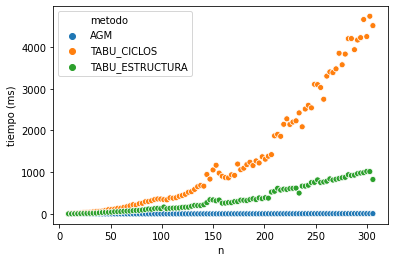

In [11]:
fig = sns.scatterplot(data = agm_filtrado_eu, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_agm_euler.svg");

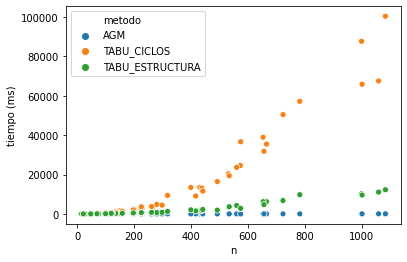

In [12]:
fig = sns.scatterplot(data = agm_filtrado_opt, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_agm_opt.svg");

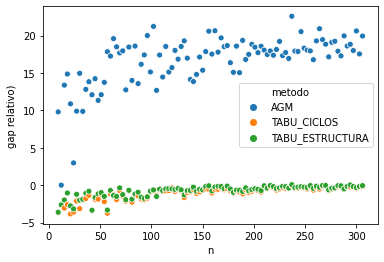

In [107]:
fig = sns.scatterplot(data = agm_filtrado_eu, x='n', y='gap', hue='metodo');
fig.set(xlabel='n', ylabel='gap relativo)');

plt.savefig("graficos/costo-TABU_agm_eu.svg");

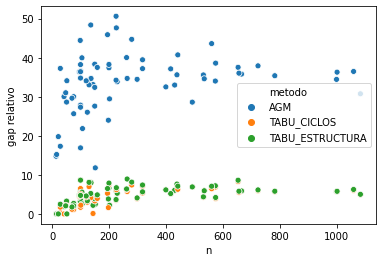

In [108]:
fig = sns.scatterplot(data = agm_filtrado_opt, x='n', y='gap', hue='metodo'); #HAY QUE ELIMINAR LOS OUTLIERS
fig.set(xlabel='n', ylabel='gap relativo');

plt.savefig("graficos/costo-TABU_agm_opt.svg");

### GA

In [109]:
ga_filtrado_eu = df_eulerianos[(df_eulerianos["metodo"] == "GA")].copy()
ga_tabu_eu = df_resultados_tabu_ga_eu.copy()

ga_filtrado_opt = df_resultados_opts[(df_resultados_opts["metodo"] =="GA") & (df_resultados_opts["n"] < 1100)]
ga_tabu_opt=df_resultados_tabu_ga_opt.copy()

ga_filtrado_eu = ga_filtrado_eu.append(ga_tabu_eu, ignore_index=True)
ga_filtrado_opt = ga_filtrado_opt.append(ga_tabu_opt, ignore_index = True)

ga_filtrado_eu = gap(ga_filtrado_eu)


ga_filtrado_eu=limpiar(ga_filtrado_eu)
ga_filtrado_opt = limpiar(ga_filtrado_opt) 




<ipython-input-97-87eb52dc22d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fila_n["metodo"] = (fila_n["metodo"].split(" "))[0]


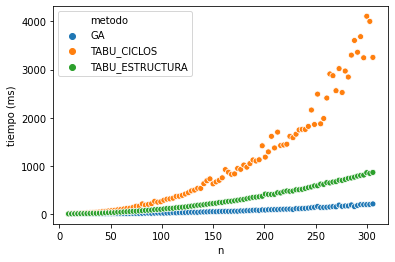

In [42]:
fig = sns.scatterplot(data = ga_filtrado_eu, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_GA_eu.svg");

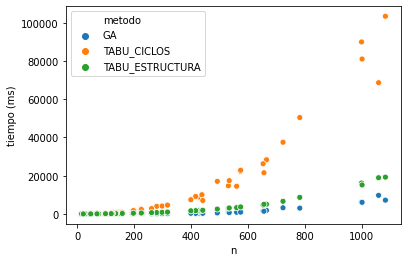

In [43]:
fig = sns.scatterplot(data = ga_filtrado_opt, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_GA_opt.svg");

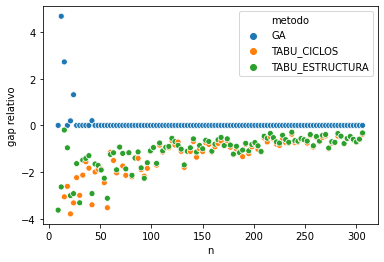

In [110]:
fig = sns.scatterplot(data = ga_filtrado_eu, x='n', y='gap', hue='metodo');
fig.set(xlabel='n', ylabel='gap relativo');

plt.savefig("graficos/costo-TABU_GA_eu.svg");

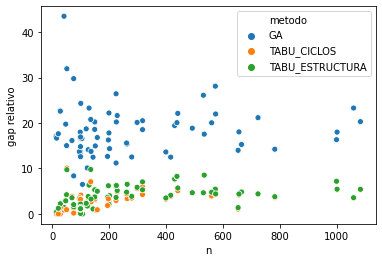

In [111]:
fig = sns.scatterplot(data = ga_filtrado_opt, x='n', y='gap', hue='metodo'); #Hay que eliminar los outliers
fig.set(xlabel='n', ylabel='gap relativo');

plt.savefig("graficos/costo-TABU_GA_opt.svg");

### ins

In [112]:
ins_filtrado_eu = df_eulerianos[(df_eulerianos["metodo"] == "INS")].copy()
ins_tabu_eu = df_resultados_tabu_ins_eu.copy()

ins_filtrado_opt = df_resultados_opts[(df_resultados_opts["metodo"] =="INS") & (df_resultados_opts["n"] < 1100)]
ins_tabu_opt=df_resultados_tabu_ins_opt.copy()

ins_filtrado_eu = ins_filtrado_eu.append(ins_tabu_eu, ignore_index=True)
ins_filtrado_opt = ins_filtrado_opt.append(ins_tabu_opt, ignore_index = True)

ins_filtrado_eu = gap(ins_filtrado_eu)


ins_filtrado_eu=limpiar(ins_filtrado_eu)
ins_filtrado_opt = limpiar(ins_filtrado_opt) 



<ipython-input-97-87eb52dc22d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fila_n["metodo"] = (fila_n["metodo"].split(" "))[0]


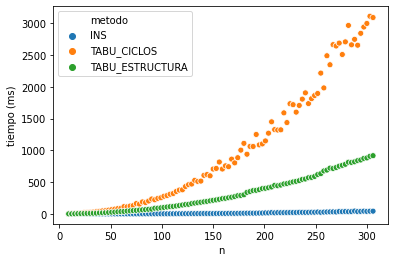

In [113]:
fig = sns.scatterplot(data = ins_filtrado_eu, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_ins_eu.svg");

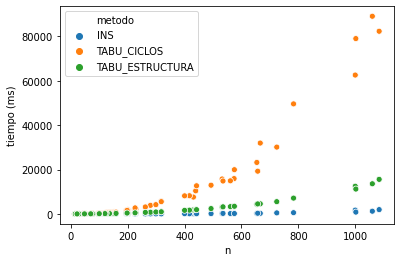

In [114]:
fig = sns.scatterplot(data = ins_filtrado_opt, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');

plt.savefig("graficos/tiempo-TABU_ins_opt.svg");

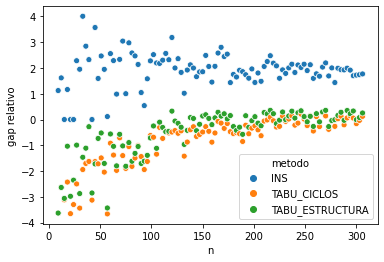

In [115]:
fig = sns.scatterplot(data = ins_filtrado_eu, x='n', y='gap', hue='metodo');
fig.set(xlabel='n', ylabel='gap relativo');

plt.savefig("graficos/costo-TABU_ins_eu.svg");

In [59]:
df = ins_filtrado_eu[(ins_filtrado_eu["n"]>100) & (ins_filtrado_eu["n"]<200)]
display(df)

dataset    n        m           metodo       tiempo  costo  \
31   grafo-euleriano  102   5151.0              INS     1.961652  31945   
32   grafo-euleriano  105   5460.0              INS     1.814808  54285   
33   grafo-euleriano  108   5778.0              INS     2.168436  37011   
34   grafo-euleriano  111   6105.0              INS     2.229202  24281   
35   grafo-euleriano  114   6441.0              INS     3.066828  49239   
..               ...  ...      ...              ...          ...    ...   
223  grafo-euleriano  192  18336.0  TABU_ESTRUCTURA   371.486000  45485   
224  grafo-euleriano  195  18915.0      TABU_CICLOS  1085.250000  58643   
225  grafo-euleriano  195  18915.0  TABU_ESTRUCTURA   381.499000  58791   
226  grafo-euleriano  198  19503.0      TABU_CICLOS  1100.450000  57238   
227  grafo-euleriano  198  19503.0  TABU_ESTRUCTURA   398.169000  57404   

          tp       gap  
31       NaN  2.519255  
32       NaN  2.195071  
33       NaN  2.178234  
34       NaN  2.304711  
35       NaN  2.566292  
..       ...       ...  
223  TSP_INS       NaN  
224  TSP_INS       NaN  
225  TSP_INS       NaN  
226  TSP_INS       NaN  
227  TSP_INS       NaN  

[99 rows x 8 columns]

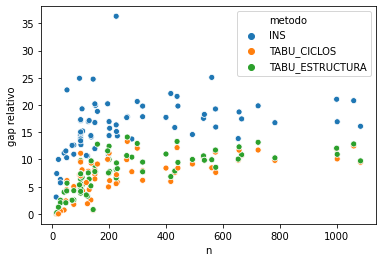

In [117]:
fig = sns.scatterplot(data = ins_filtrado_opt, x='n', y='gap', hue='metodo');
fig.set(xlabel='n', ylabel='gap relativo');

plt.savefig("graficos/costo-TABU_ins_opt.svg");